# CUSTOMER PURCHASE BEHAVIOUR SEGMENTATION & RECOMMENDER SYSTEM MODEL

## Using Unsupervised Machine Learning (Clustering Technique)

In [4]:
# Importing pandas library
import pandas as pd

In [5]:
# Loading the dataset into pandas
df = pd.read_csv('data_unsupervised.csv', encoding="latin1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
# Inspection the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
#Summary statistics for categorical variables
#count count the number of rows .T transform the table and show the object
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [8]:
#Summary statistics for categorical variables
#count count the number of rows .T transform the table and show the object
df.describe(include='object').T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,10/31/2011 14:41,1114
Country,541909,38,United Kingdom,495478


In [9]:
#check for missing values
missing_data = df.isna().sum()
missing_data / len(df)*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

## Handling missing values

In [11]:
#dropping the missing values drop na will go to check the na value in the row and drop them, while drop only will drop the whole column
df = df.dropna(subset=['Description', 'CustomerID'])

In [12]:
#check for missing values
missing_data = df.isna().sum()
missing_data / len(df)*100

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

In [13]:
#Finding the duplicate rows(keeping all instances)
duplicate_rows = df[df.duplicated(keep=False)]

#sorting the data by certain columns to see the duplicate rows next to each other
duplicate_rows_sorted = duplicate_rows.sort_values(by=['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Quantity'])

#Displaying the first 10  records
duplicate_rows_sorted.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
578,536412,21448,12 DAISY PEGS IN WOOD BOX,1,12/1/2010 11:49,1.65,17920.0,United Kingdom
598,536412,21448,12 DAISY PEGS IN WOOD BOX,1,12/1/2010 11:49,1.65,17920.0,United Kingdom


In [14]:
# Cheching for duplicates
df.duplicated().sum()

5225

In [15]:
# Dropping duplicate
df= df.drop_duplicates()

In [16]:
# Rechecking for duplicate after dropping
df.duplicated().sum()

0

In [17]:
# Inspecting the dataset size
df.shape

(401604, 8)

In [18]:
# creating new column transaction status to filter cancelled and completed transaction
import numpy as np
df['Transaction_Status'] = np.where(df['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')

#Analyzing cancelled transaction
cancelled_transactions = df[df["Transaction_Status"]=='Cancelled']
cancelled_transactions.describe().drop('CustomerID', axis=1).T

,count,mean,std,min,25%,50%,75%,max
Quantity,8872.0,-30.774910,1172.249902,-80995.00,-6.00,-2.00,-1.00,-1.0
UnitPrice,8872.0,18.899512,445.190864,0.01,1.45,2.95,4.95,38970.0


In [19]:
#calculating cancelled transaction in percentage
cancelled_percentage = (cancelled_transactions.shape[0] / df.shape[0]) * 100
cancelled_percentage

2.209141343213713

## Step 4.1 | RFM Features

In [21]:
#converting invoice column to date data type from object dtype
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
#extracting only date from the invoice date column without the time we only need the date to the new col invoice day
df['InvoiceDay'] = df['InvoiceDate'].dt.date
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status,InvoiceDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01


In [22]:
#checking the recent date
df['InvoiceDay'].max()

datetime.date(2011, 12, 9)

In [23]:
# Get the most recent purchase date for each customer
customer_data = df.groupby('CustomerID')['InvoiceDay'].max().reset_index()

# Get the latest invoice date in the dataset
most_recent_data = df['InvoiceDay'].max()

# Ensure date columns are in datetime format
customer_data['InvoiceDay'] = pd.to_datetime(customer_data['InvoiceDay'])
most_recent_data = pd.to_datetime(most_recent_data)

# Compute days since each customer's last purchase
customer_data['Days_Since_Last_Purchase'] = (most_recent_data - customer_data['InvoiceDay']).dt.days

# Remove 'InvoiceDay' as it's no longer needed
customer_data.drop(columns=['InvoiceDay'], inplace=True)

In [24]:
# Dispaly the first five of the result
customer_data.head()

,CustomerID,Days_Since_Last_Purchase
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310


## Step 4.2|Frequency (F)

In [26]:
# Count unique transactions per customer
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
total_transactions.rename(columns={'InvoiceNo': 'Total_transactions'}, inplace=True)

# Sum total quantity of products purchased per customer
total_products_purchased = df.groupby('CustomerID')['Quantity'].sum().reset_index()
total_products_purchased.rename(columns={'Quantity': 'Total_Products_Purchased'}, inplace=True)

# Merge transaction and product data with existing customer data
custumer_data_new = pd.merge(customer_data, total_transactions, on='CustomerID')
custumer_data_new = pd.merge(custumer_data_new, total_products_purchased, on='CustomerID')

# Preview the merged dataset
custumer_data_new.head()

,CustomerID,Days_Since_Last_Purchase,Total_transactions,Total_Products_Purchased
0,12346.0,325,2,0
1,12347.0,2,7,2458
2,12348.0,75,4,2341
3,12349.0,18,1,631
4,12350.0,310,1,197


# Step 4.3|Monetory(M)

In [28]:
# Calculate total spend per transaction
df['Total_spend'] = df['UnitPrice'] * df['Quantity']

# Aggregate total spend per customer
total_spend = df.groupby('CustomerID')['Total_spend'].sum().reset_index()

# Preview total spend data
total_spend.head()

,CustomerID,Total_spend
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [29]:
# Compute total spend per transaction
df['Total_Spend'] = df['UnitPrice'] * df['Quantity']

# Calculate total spend per customer
total_spend = df.groupby('CustomerID')['Total_Spend'].sum().reset_index()

# Calculate the average transaction value for each customer
average_transaction_value = total_spend.merge(total_transactions, on='CustomerID')
average_transaction_value['Average_Transaction_Value'] = average_transaction_value['Total_Spend'] / average_transaction_value['Total_transactions']

# Merge the new features into the customer_data dataframe
customer_data_new2 = pd.merge(custumer_data_new, total_spend, on='CustomerID')
customer_data_new3 = pd.merge(customer_data_new2, average_transaction_value[['CustomerID', 'Average_Transaction_Value']], on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data_new3.head()

,CustomerID,Days_Since_Last_Purchase,Total_transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value
0,12346.0,325,2,0,0.00,0.000000
1,12347.0,2,7,2458,4310.00,615.714286
2,12348.0,75,4,2341,1797.24,449.310000
3,12349.0,18,1,631,1757.55,1757.550000
4,12350.0,310,1,197,334.40,334.400000


# Step 4.4| Product Diversity (PD)

In [31]:
# Calculate the unique_products_purchased value for each customer
unique_products_purchased = df.groupby('CustomerID')['StockCode'].nunique().reset_index()
unique_products_purchased.rename(columns = {'StockCode':'Unique_Products_Purchase'}, inplace = True)

# Merge the new features into the customer_data dataframe
customer_data_new4 = pd.merge(customer_data_new3, unique_products_purchased, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data_new4.head()

,CustomerID,Days_Since_Last_Purchase,Total_transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchase
0,12346.0,325,2,0,0.00,0.000000,1
1,12347.0,2,7,2458,4310.00,615.714286,103
2,12348.0,75,4,2341,1797.24,449.310000,22
3,12349.0,18,1,631,1757.55,1757.550000,73
4,12350.0,310,1,197,334.40,334.400000,17


# Step 4.5| Behavoural Features (BF)

In [33]:
# Extract day of the week from invoice date (0 = Monday, 6 = Sunday)
df['Day_Of_Week'] = df['InvoiceDate'].dt.dayofweek

# Extract hour of the day from invoice date
df['Hour'] = df['InvoiceDate'].dt.hour

In [34]:
# Calculate days between consecutive purchases for each customer
days_between_purchases = df.groupby('CustomerID')['InvoiceDay'].apply(lambda x: (x.diff().dropna()).apply(lambda y:y.days))
average_days_between_purchases = days_between_purchases.groupby('CustomerID').mean().reset_index()
average_days_between_purchases.rename(columns = {'InvoiceDay': 'Average_Days_Between_Purchases'}, inplace = True)

# find the favourite shopping day of the week
favourite_shopping_day = df.groupby(['CustomerID', 'Day_Of_Week']).size().reset_index(name='Count')
favourite_shopping_day = favourite_shopping_day.loc[favourite_shopping_day.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Day_Of_Week']]

favourite_shopping_hour = df.groupby(['CustomerID', 'Hour']).size().reset_index(name='Count')
favourite_shopping_hour = favourite_shopping_hour.loc[favourite_shopping_hour.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Hour']]

# Merge the new features into the customer_data dataframe
customer_data_new5 = pd.merge(customer_data_new4, average_days_between_purchases, on='CustomerID')
customer_data_new6 = pd.merge(customer_data_new5, favourite_shopping_day, on='CustomerID')
customer_data_new7 = pd.merge(customer_data_new6, favourite_shopping_hour, on='CustomerID')


# Display the first few rows of the customer_data dataframe
customer_data_new7.head()

C:\Users\User\AppData\Local\Temp\ipykernel_14868\3944237785.py:1: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  days_between_purchases = df.groupby('CustomerID')['InvoiceDay'].apply(lambda x: (x.diff().dropna()).apply(lambda y:y.days))


,CustomerID,Days_Since_Last_Purchase,Total_transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchase,Average_Days_Between_Purchases,Day_Of_Week,Hour
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14
2,12348.0,75,4,2341,1797.24,449.310000,22,9.433333,3,19
3,12349.0,18,1,631,1757.55,1757.550000,73,0.000000,0,9
4,12350.0,310,1,197,334.40,334.400000,17,0.000000,2,16


In [35]:
# Display the top countries by their proportion of total transactions
df['Country'].value_counts(normalize=True).head()

Country
United Kingdom    0.888258
Germany           0.023605
France            0.021103
EIRE              0.018613
Spain             0.006295
Name: proportion, dtype: float64

In [36]:
# Group by CustomerID and Country to get the number of transactions per country for each customer
customer_country = df.groupby(['CustomerID', 'Country']).size().reset_index(name='Number_of_Transactions')

# Get the country with the maximum number of transactions for each customer (in case a customer has transactions from multiple countries)
customer_main_country = customer_country.sort_values('Number_of_Transactions', ascending=False).drop_duplicates('CustomerID')

# Create a binary column indicating whether the customer is from the UK or not
customer_main_country['Is_UK'] = customer_main_country['Country'].apply(lambda x: 1 if x == 'United Kingdom' else 0)

# Merge this data with our customer_data dataframe
customer_data_new7 = pd.merge(customer_data_new7, customer_main_country[['CustomerID', 'Is_UK']], on='CustomerID', how='left')

# Display the first few rows of the customer_data dataframe
customer_data_new7.head()

,CustomerID,Days_Since_Last_Purchase,Total_transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchase,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10,1
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0
2,12348.0,75,4,2341,1797.24,449.310000,22,9.433333,3,19,0
3,12349.0,18,1,631,1757.55,1757.550000,73,0.000000,0,9,0
4,12350.0,310,1,197,334.40,334.400000,17,0.000000,2,16,0


In [37]:
# Count how many customers are from the UK vs. other countries
customer_data_new7['Is_UK'].value_counts()

Is_UK
1    3874
0     419
Name: count, dtype: int64

# Step 4.6| Cancellation Insight (CI)

In [40]:
# Calculating the total number of transactions cancelled by each customer
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

# Calculating the total number of transactions cancelled by each customer

cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']
cancellation_frequency = cancelled_transactions.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
cancellation_frequency.rename(columns={'InvoiceNo':'Cancellation_Frequency'}, inplace = True) 


custumer_data_new8 = pd.merge(customer_data_new7, cancellation_frequency, on = 'CustomerID', how ='left')
custumer_data_new8['Cancellation_Frequency'].fillna(0, inplace = True)

custumer_data_new8['Cancellation_Frequency'] = custumer_data_new8['Cancellation_Frequency']/total_transactions['InvoiceNo']
custumer_data_new8.head()

C:\Users\User\AppData\Local\Temp\ipykernel_14868\316307405.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  custumer_data_new8['Cancellation_Frequency'].fillna(0, inplace = True)


,CustomerID,Days_Since_Last_Purchase,Total_transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchase,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10,1,0.5
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0,0.0
2,12348.0,75,4,2341,1797.24,449.310000,22,9.433333,3,19,0,0.0
3,12349.0,18,1,631,1757.55,1757.550000,73,0.000000,0,9,0,0.0
4,12350.0,310,1,197,334.40,334.400000,17,0.000000,2,16,0,0.0


# Step 4.7 | Seasonality & Trend (ST)

In [42]:
# Import linregress for performing simple linear regression analysis
from scipy.stats import linregress

In [43]:
# 📌 Code Explanation:
# Extract year and month from invoice date
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

# Calculate total monthly spending per customer
monthly_spending = df.groupby(['CustomerID', 'Year', 'Month'])['Total_Spend'].sum().reset_index()

# Compute mean and standard deviation of monthly spending for each customer
seasonal_buying_patterns = monthly_spending.groupby('CustomerID')['Total_Spend'].agg(['mean','std']).reset_index()
seasonal_buying_patterns.rename(columns = {'mean': 'Monthly_Spending_Mean', 'std':'Monthly_Spending_Std'}, inplace = True)

# Replace NaN std values (e.g., single-month customers) with 0
seasonal_buying_patterns['Monthly_Spending_Std'].fillna(0, inplace=True)

# Calculate Trends in Spending 
# We are using the slope of the linear trend line fitted to the customer's spending over time as an indicator of spending trends
def calculate_trend(spend_data):
    # If there are more than one data points, we calculate the trend using linear regression
    if len(spend_data) > 1:
        x = np.arange(len(spend_data))
        slope, _, _, _, _ = linregress(x, spend_data)
        return slope
    # If there is only one data point, no trend can be calculated, hence we return 0
    else:
        return 0
# Apply the calculate_trend function to find the spending trend for each customer
spending_trends = monthly_spending.groupby('CustomerID')['Total_Spend'].apply(calculate_trend).reset_index()
spending_trends.rename(columns={'Total_Spend': 'Spending_Trend'}, inplace=True)

# Merge the new features into the customer_data dataframe
customer_data9 = pd.merge(custumer_data_new8, seasonal_buying_patterns, on='CustomerID')
customer_data9 = pd.merge(customer_data9, spending_trends, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data9.head()

C:\Users\User\AppData\Local\Temp\ipykernel_14868\1156644385.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  seasonal_buying_patterns['Monthly_Spending_Std'].fillna(0, inplace=True)


,CustomerID,Days_Since_Last_Purchase,Total_transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchase,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10,1,0.5,0.000000,0.000000,0.000000
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0,0.0,615.714286,341.070789,4.486071
2,12348.0,75,4,2341,1797.24,449.310000,22,9.433333,3,19,0,0.0,449.310000,301.159918,-160.884000
3,12349.0,18,1,631,1757.55,1757.550000,73,0.000000,0,9,0,0.0,1757.550000,0.000000,0.000000
4,12350.0,310,1,197,334.40,334.400000,17,0.000000,2,16,0,0.0,334.400000,0.000000,0.000000


In [44]:
# Check the data types of each column in the DataFrame
customer_data9.dtypes

CustomerID                        float64
Days_Since_Last_Purchase            int64
Total_transactions                  int64
Total_Products_Purchased            int64
Total_Spend                       float64
Average_Transaction_Value         float64
Unique_Products_Purchase            int64
Average_Days_Between_Purchases    float64
Day_Of_Week                         int32
Hour                                int32
Is_UK                               int64
Cancellation_Frequency            float64
Monthly_Spending_Mean             float64
Monthly_Spending_Std              float64
Spending_Trend                    float64
dtype: object

In [45]:
# Import StandardScaler for normalizing features to have zero mean and unit variance
from sklearn.preprocessing import StandardScaler

In [46]:
# Initialize the StandardScaler
scaler = StandardScaler()

# List of columns that don't need to be scaled
columns_to_exclude = ['CustomerID', 'Is_UK', 'Day_Of_Week']

# List of columns that need to be scaled
columns_to_scale = customer_data9.columns.difference(columns_to_exclude)

# Copy the cleaned dataset
customer_data_scaled = customer_data9.copy()

# Applying the scaler to the necessary columns in the dataset
customer_data_scaled[columns_to_scale] = scaler.fit_transform(customer_data_scaled[columns_to_scale])

# Display the first few rows of the scaled data
customer_data_scaled.head()

,CustomerID,Days_Since_Last_Purchase,Total_transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchase,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12346.0,2.384566,-0.334919,-0.240788,-0.232359,-0.919014,-0.714653,-0.298536,1,-1.074012,1,0.087870,-0.553559,-0.287074,0.054884
1,12347.0,-0.882452,0.196618,0.281118,0.287622,0.861102,0.474121,-0.123416,1,0.658207,0,-0.335727,0.207580,0.219412,0.064404
2,12348.0,-0.144085,-0.122304,0.256275,-0.015531,0.380004,-0.469905,0.520656,3,2.823481,0,-0.335727,0.001873,0.160145,-0.286530
3,12349.0,-0.720618,-0.441227,-0.106808,-0.020319,4.162308,0.124482,-0.298536,0,-1.507067,0,-0.335727,1.619103,-0.287074,0.054884
4,12350.0,2.232847,-0.441227,-0.198959,-0.192015,0.047783,-0.528179,-0.298536,2,1.524317,0,-0.335727,-0.140178,-0.287074,0.054884


In [47]:
# Import matplotlib for data visualization and KMeans for clustering analysis
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

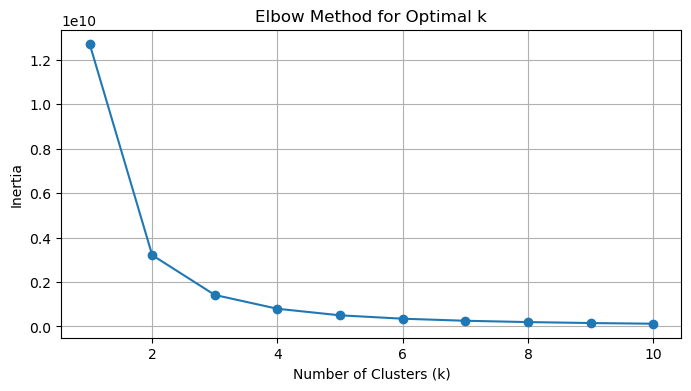

In [48]:
# Apply the Elbow Method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(customer_data_scaled)
    inertia.append(kmeans.inertia_)

# Ploting the Elbow Curve
plt.figure(figsize=(8,4))
plt.plot(k_range, inertia, marker = 'o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [57]:
# Import silhouette_score to evaluate clustering performance
from sklearn.metrics import silhouette_score

In [59]:
# Fit KMeans with 4 clusters and assign cluster labels
kmeans = KMeans(n_clusters=4, random_state=123)
labels = kmeans.fit_predict(customer_data_scaled)

# Evaluate clustering quality using silhouette score
score = silhouette_score(customer_data_scaled, labels)
print(f"Silhouette Score for k=4: {score:.4f}")

Silhouette Score for k=4: 0.5712


In [60]:
# Assign cluster labels to the customer data and Display a random sample of 10 rows
customer_data9['Cluster'] = labels
customer_data9.sample(10)

,CustomerID,Days_Since_Last_Purchase,Total_transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchase,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,Cluster
3769,17552.0,42,6,708,9.099600e+02,1.516600e+02,45,6.600000,3,18,1,0.666667,3.033200e+02,309.697899,-151.235000,2
4284,18274.0,17,2,0,1.776357e-15,8.881784e-16,11,0.619048,1,10,1,0.142857,1.776357e-15,0.000000,0.000000,2
2110,15240.0,44,7,1361,1.685570e+03,2.407957e+02,61,3.987805,2,9,1,0.666667,2.809283e+02,146.196034,53.339714,3
2073,15193.0,60,1,144,4.993200e+02,4.993200e+02,19,0.000000,0,8,1,0.000000,4.993200e+02,0.000000,0.000000,3
2152,15296.0,44,10,1757,3.610310e+03,3.610310e+02,137,1.417085,0,11,1,4.000000,6.017183e+02,454.686297,-65.799143,3
2893,16325.0,44,5,164,5.105400e+02,1.021080e+02,14,10.578947,3,13,1,0.666667,1.701800e+02,47.905144,4.950000,0
472,12952.0,5,5,652,1.382840e+03,2.765680e+02,64,0.924051,3,16,1,0.100000,3.457100e+02,302.375815,-166.490000,1
3660,17404.0,4,18,32324,3.030082e+04,1.683379e+03,111,1.780000,0,10,0,0.333333,3.030082e+03,2057.416983,-193.759636,2
629,13177.0,64,1,91,2.824500e+02,2.824500e+02,17,0.000000,3,9,1,0.000000,2.824500e+02,0.000000,0.000000,1
678,13247.0,17,4,328,5.011200e+02,1.252800e+02,18,2.708333,6,11,1,0.000000,1.670400e+02,120.160981,-97.410000,1


In [63]:
# Count the number of customers in each cluster
customer_data9['Cluster'].value_counts()

Cluster
3    1091
1    1087
0    1080
2    1035
Name: count, dtype: int64

In [65]:
# Compute the average feature values for each cluster to understand customer group characteristics
cluster_summary = customer_data9.groupby('Cluster').mean(numeric_only=True)
cluster_summary

,CustomerID,Days_Since_Last_Purchase,Total_transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchase,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
Cluster,,,,,,,,,,,,,,,
0,16077.930556,90.912963,4.651852,937.244444,1553.878307,308.562122,60.446296,2.906068,2.614815,12.550000,0.996296,0.372530,415.553523,174.091797,-35.459738
1,13065.660534,89.177553,5.388224,1237.588776,2043.220958,378.043963,60.081877,3.366726,2.549218,12.229991,0.643974,0.408860,502.748590,216.744572,-43.344346
2,17557.641546,88.698551,5.041546,1077.093720,1945.881585,280.040198,62.166184,4.054452,2.480193,12.742995,0.993237,0.353293,422.282782,185.022897,-17.365309
3,14583.621448,88.180568,5.510541,1279.665445,2158.595262,303.029118,66.547204,3.449843,2.519707,12.410632,0.980752,0.448039,449.162387,196.875842,-7.007485


# 🧠 Customer Segmentation: Cluster Profiling using KMeans

This analysis summarizes and interprets the four customer clusters obtained from KMeans clustering.

## 📊 Cluster Summary Table

| Cluster | CustomerID | Days_Since_Last_Purchase | Total_Transactions | Total_Products_Purchased | Total_Spend | Avg_Transaction_Value | Unique_Products_Purchased | Avg_Days_Between_Purchases | Day_Of_Week | Hour | Is_UK | Cancellation_Frequency | Cancellation_Rate | Monthly_Spending_Mean | Monthly_Spending_Std | Spending_Trend |
|---------|-------------|----------------------------|---------------------|---------------------------|-------------|------------------------|----------------------------|------------------------------|---------------|--------|--------|--------------------------|----------------------|---------------------------|-----------------------|-----------------|
| *0*   | 16077.93    | 90.91                      | 4.65                | 937.24                    | 1553.88     | 308.56                 | 60.45                      | 2.91                         | 2.61          | 12.55  | 0.996  | 0.748                    | 0.372                | 415.55                    | 174.09                | -35.46           |
| *1*   | 13065.66    | 89.18                      | 5.39                | 1237.59                   | 2043.22     | 378.04                 | 60.08                      | 3.37                         | 2.55          | 12.23  | 0.644  | 0.969                    | 0.409                | 502.75                    | 216.74                | -43.34           |
| *2*   | 17557.64    | 88.70                      | 5.04                | 1077.09                   | 1945.88     | 280.04                 | 62.17                      | 4.05                         | 2.48          | 12.74  | 0.993  | 0.722                    | 0.353                | 422.28                    | 185.02                | -17.37           |
| *3*   | 14583.62    | 88.18                      | 5.51                | 1279.67                   | 2158.60     | 303.03                 | 66.55                      | 3.45                         | 2.52          | 12.41  | 0.981  | 0.942                    | 0.448                | 449.16                    | 196.88                | -7.01            |

---

## 🔍 Cluster Interpretations

### 🔴 Cluster 1: *Top Spenders Declining*
- Highest Total Spend and Transaction Value.
- *Very high risk of churn* with a sharp decline in Spending_Trend.
- Action: Win-back emails, loyalty bonuses, personalized incentives.

---

### 🟡 Cluster 0: *High-Value Dropping Off*
- Fewer transactions, but large purchases.
- Also declining in spending trend.
- Action: Re-engagement campaigns, personalized promotions.

---

### 🟢 Cluster 2: *Moderate Value, Stable*
- Mid-range spending and transaction value.
- Better spending trend than clusters 0 and 1.
- Action: Educate and nurture — upsell opportunities, cross-sell campaigns.

---

### 🔵 Cluster 3: *Loyal, Consistent Buyers*
- Most stable segment with best Spending_Trend.
- High product variety and frequency.
- Action: Encourage referrals, VIP programs, maintain loyalty.

---

In [74]:
# Step 1: Ensure consistent CustomerID data type
df['CustomerID'] = df['CustomerID'].astype('float')
customer_data9['CustomerID'] = customer_data9['CustomerID'].astype('float')

# Step 2: Merge transactions with cluster labels from customer_data
merged_data = df.merge(customer_data9[['CustomerID', 'Cluster']], on='CustomerID', how='inner')

# Step 3: Identify top 10 best-selling products in each cluster
best_selling_products = (
    merged_data.groupby(['Cluster', 'StockCode', 'Description'])['Quantity']
    .sum()
    .reset_index()
)

# Sort and get top 10 per cluster
best_selling_products = best_selling_products.sort_values(by=['Cluster', 'Quantity'], ascending=[True, False])
top_products_per_cluster = best_selling_products.groupby('Cluster').head(10)

# Step 4: Track products purchased by each customer
customer_purchases = (
    merged_data.groupby(['CustomerID', 'Cluster', 'StockCode'])['Quantity']
    .sum()
    .reset_index()
)

# Step 5: Generate recommendations
recommendations = []

for cluster in top_products_per_cluster['Cluster'].unique():
    top_products = top_products_per_cluster[top_products_per_cluster['Cluster'] == cluster]
    customers_in_cluster = customer_data9[customer_data9['Cluster'] == cluster]['CustomerID']
    
    for customer in customers_in_cluster:
        # Products already purchased
        purchased = customer_purchases[
            (customer_purchases['CustomerID'] == customer) & 
            (customer_purchases['Cluster'] == cluster)
        ]['StockCode'].tolist()

        # Recommend top 3 products not yet purchased
        top_not_purchased = top_products[~top_products['StockCode'].isin(purchased)].head(3)
        recs = top_not_purchased[['StockCode', 'Description']].values.flatten().tolist()
        
        # Fill with None if less than 3
        while len(recs) < 6:
            recs.extend([None, None])

        recommendations.append([customer, cluster] + recs)

# Step 6: Convert recommendations to DataFrame
recommendations_df = pd.DataFrame(recommendations, columns=[
    'CustomerID', 'Cluster',
    'Rec1_StockCode', 'Rec1_Description',
    'Rec2_StockCode', 'Rec2_Description',
    'Rec3_StockCode', 'Rec3_Description'
])

# Step 7: Merge recommendations with full customer data
customer_data_with_recommen`dations = customer_data9.merge(
    recommendations_df, on=['CustomerID', 'Cluster'], how='right'
)

In [76]:
# Preview the first few rows of the customer data with product recommendations

customer_data_with_recommendations.head()

,CustomerID,Days_Since_Last_Purchase,Total_transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchase,Average_Days_Between_Purchases,Day_Of_Week,Hour,...,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,Cluster,Rec1_StockCode,Rec1_Description,Rec2_StockCode,Rec2_Description,Rec3_StockCode,Rec3_Description
0,15333.0,208,1,344,1028.56,1028.560000,16,0.000000,6,13,...,1028.560,0.000000,0.00,0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,85099B,JUMBO BAG RED RETROSPOT,17003,BROCADE RING PURSE
1,15334.0,156,3,273,350.82,116.940000,67,0.175258,2,11,...,175.410,67.712545,-95.76,0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,85099B,JUMBO BAG RED RETROSPOT,17003,BROCADE RING PURSE
2,15335.0,53,1,79,170.22,170.220000,34,0.000000,0,12,...,170.220,0.000000,0.00,0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,85099B,JUMBO BAG RED RETROSPOT,17003,BROCADE RING PURSE
3,15339.0,66,3,414,557.57,185.856667,79,2.896552,1,12,...,278.785,29.535850,41.77,0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,85099B,JUMBO BAG RED RETROSPOT,17003,BROCADE RING PURSE
4,15341.0,80,1,812,2020.52,2020.520000,17,0.000000,1,9,...,2020.520,0.000000,0.00,0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,17003,BROCADE RING PURSE,21915,RED HARMONICA IN BOX
